<a href="https://colab.research.google.com/github/vvviet2908/AOD/blob/main/AOD_lab_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1/ Vo Van Viet
2/ Khong Minh Duc
3/ Le Tran Minh Hoang
4/ Le Bao Phuc
5/ Cao Ngoc Bao Long**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vietvov","key":"a5dce9e485e011cb49c69b59ccd6b13e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 climate-change-earth-surface-temperature-data.zip   kaggle.json
 files						     sample_data
'kaggle (1).json'


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('climate-change-earth-surface-temperature-data.zip', 'r')
zip_ref.extractall('files')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
global_temp_country=pd.read_csv('/content/files/GlobalLandTemperaturesByCountry.csv')

In [ ]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Objects, Attribute & Attribute types:

In [ ]:
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Data object that changing over time: dt, Averagetemperature, averagetemperatureuncertainty

In [ ]:
global_temp_country.describe()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,544811.0,17.193354,10.953966,-37.658,10.025,20.901,25.814,38.842
AverageTemperatureUncertainty,545550.0,1.019057,1.201930,0.052,0.323,0.571,1.206,15.003


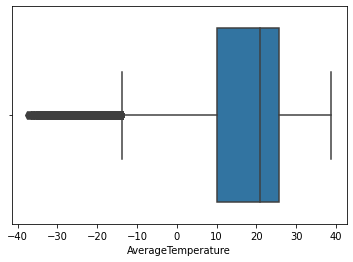

In [ ]:
sns.boxplot(x=global_temp_country['AverageTemperature'])

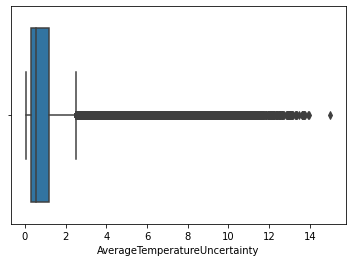

In [ ]:
sns.boxplot(x=global_temp_country['AverageTemperatureUncertainty'])

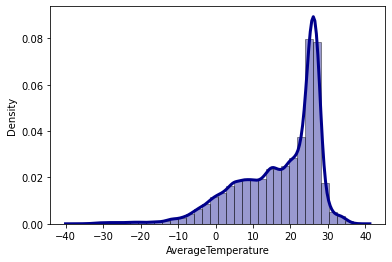

In [ ]:
sns.distplot(global_temp_country['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

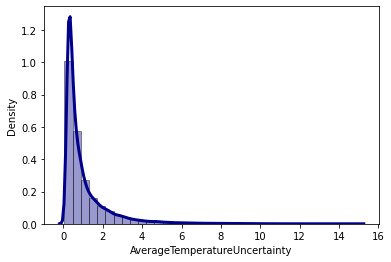

In [ ]:
sns.distplot(global_temp_country['AverageTemperatureUncertainty'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [ ]:
from scipy.stats import moment

1st Central Moment

In [ ]:
moment(global_temp_country['AverageTemperature'], moment=1)

0.0

In [ ]:
moment(global_temp_country['AverageTemperatureUncertainty'], moment=1)

0.0

2nd Central Moment

In [ ]:
moment(global_temp_country['AverageTemperature'], moment=2)

nan

In [ ]:
moment(global_temp_country['AverageTemperatureUncertainty'], moment=2)

nan

## **More Analysis**

The increased of temperature in some countries (difference between max and mean)

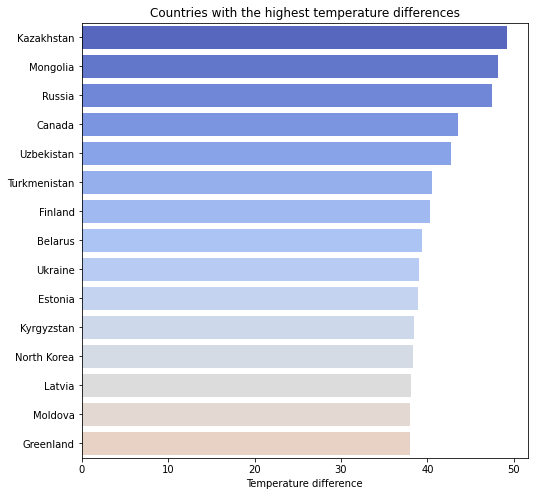

In [ ]:
max_min_list = []
countries = global_temp_country['Country'].unique()
# getting max and min temps
for country in countries:
    curr_temps = global_temp_country[global_temp_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

The rank of countries in Average Temperature

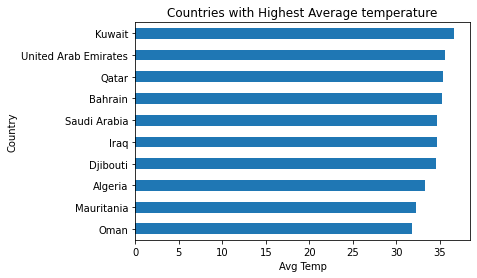

In [ ]:
ax = global_temp_country.groupby(['Country'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Avg Temp");
plt.title("Countries with Highest Average temperature");

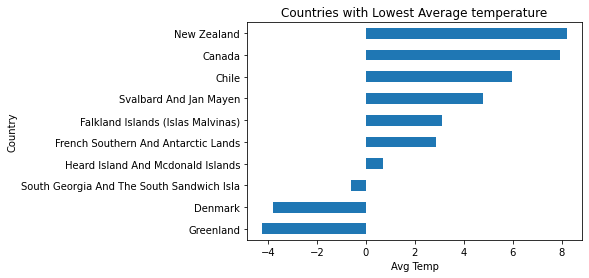

In [ ]:
ax = global_temp_country.groupby(['Country'])['AverageTemperature'].last().sort_values().head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Avg Temp");
plt.title("Countries with Lowest Average temperature");

Compare temperature by continent

In [ ]:
# Read the file (countries + cities)
countries = pd.read_csv("../content/files/GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year


In [ ]:
#the dataset didn't had continent yet, so must add the continent by merge the data of continent to this dataset
# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]
#Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:
region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

In [ ]:
countries.head()

,region,Country,year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,Algeria,1825,17.642750,2.168750
1,Africa,Algeria,1826,17.461233,2.140183
2,Africa,Algeria,1827,17.456433,2.193283
3,Africa,Algeria,1828,17.902917,2.200283
4,Africa,Algeria,1829,17.311133,2.390317


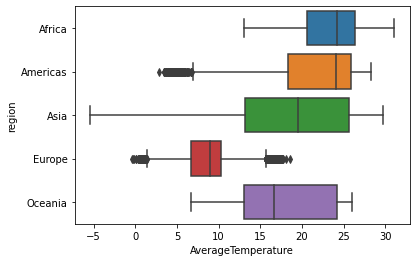

In [ ]:
sns.boxplot(x=countries['AverageTemperature'],y=countries['region'])

Distribution of each continent

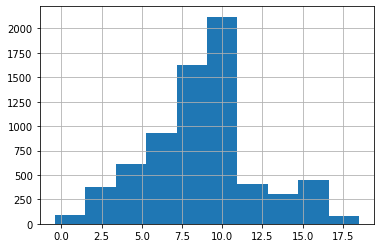

In [ ]:
eu=countries[countries['region']=='Europe']
eu['AverageTemperature'].hist()

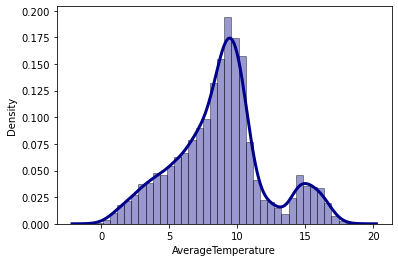

In [ ]:
sns.distplot(eu['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

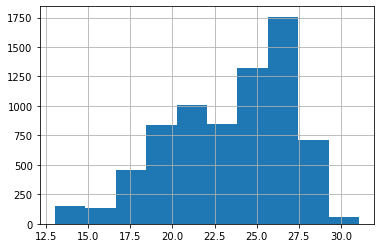

In [ ]:
afr=countries[countries['region']=='Africa']
afr['AverageTemperature'].hist()

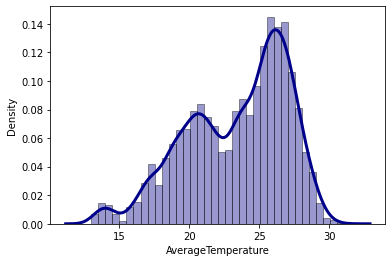

In [ ]:
sns.distplot(afr['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

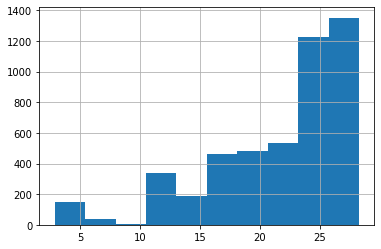

In [ ]:
ame=countries[countries['region']=='Americas']
ame['AverageTemperature'].hist()

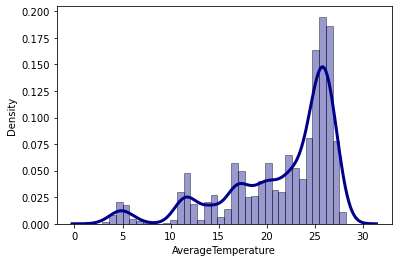

In [ ]:
sns.distplot(ame['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

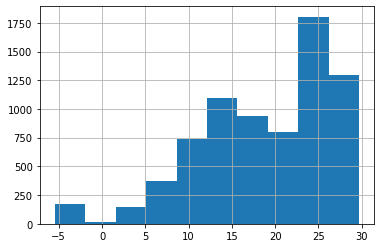

In [ ]:
asia=countries[countries['region']=='Asia']
asia['AverageTemperature'].hist()

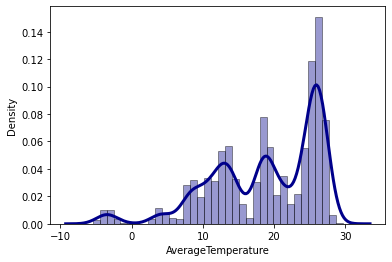

In [ ]:
sns.distplot(asia['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

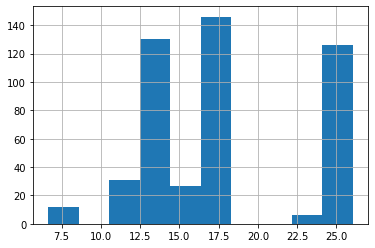

In [ ]:
oce=countries[countries['region']=='Oceania']
oce['AverageTemperature'].hist()

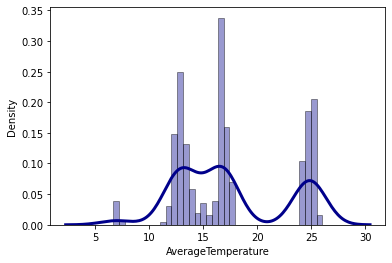

In [ ]:
sns.distplot(oce['AverageTemperature'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [ ]:
mu, sigma = eu['AverageTemperature'].mean(),  eu['AverageTemperature'].std() 
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))

2.8165182617845796

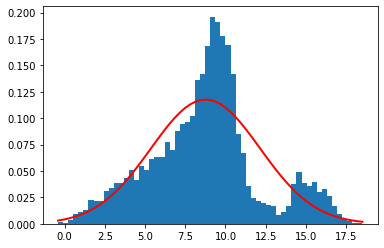

In [ ]:
count, bins, ignored = plt.hist(eu['AverageTemperature'], 60, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)
fig.show(renderer="colab")

The change in temperature and its certain over time


In [ ]:
global_temp = pd.read_csv("/content/files/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
fig.show(renderer="colab")

=> From this time series about the average temperature we can apply some statistical model such as ARIMA, ARIMAX to predict the average temperature